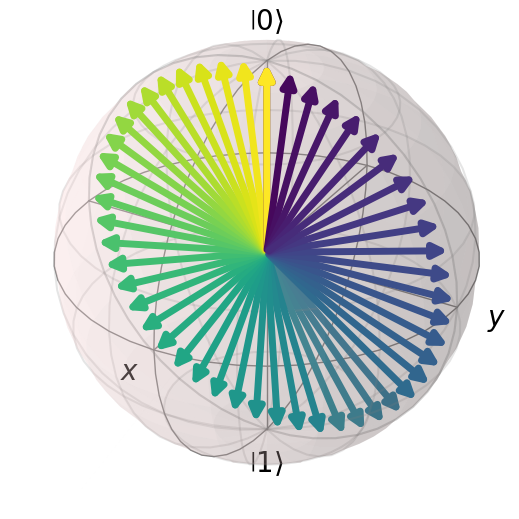

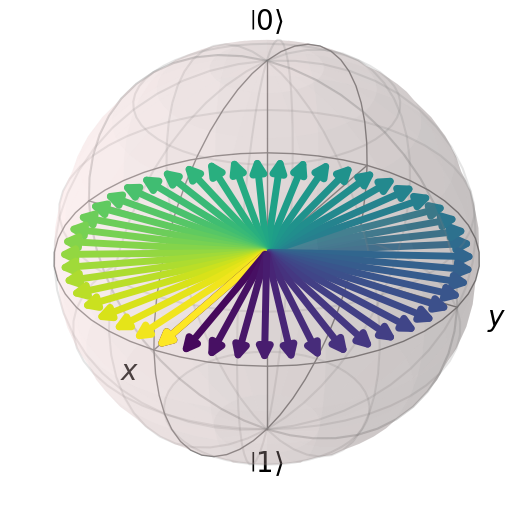

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors  # 用于颜色转换

# Qiskit 相关导入
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RXGate, RYGate
from qiskit.visualization.bloch import Bloch

# 设置采样点数量
n_points = 50
x_train = torch.linspace(0, 1, n_points, dtype=torch.float32)
theta_values = x_train * np.pi * 2

# 使用 Matplotlib 的 colormap 生成渐变色，例如 viridis
cmap = plt.get_cmap('viridis')
# 将 RGBA 元组转换为 HEX 颜色字符串
color_list = [mcolors.to_hex(cmap(x.item())) for x in x_train]

# =============================================================================
# 方法 1：仅对 |0⟩ 施加 RXGate(θ)，计算 Bloch 向量
# =============================================================================
bloch_vectors_rx = []
for theta in theta_values:
    # 构造初始态 |0>
    state = Statevector.from_label('0')
    # 施加 RXGate(θ)
    state = state.evolve(RXGate(theta.item()))

    # 获取状态向量数据（形如 [α, β]）
    vec = state.data
    a = vec[0]
    b = vec[1]
    # 根据 Bloch 球的对应关系计算三维坐标：
    # x = 2·Re(αβ*), y = 2·Im(αβ*), z = |α|^2 - |β|^2
    bloch_x = 2 * np.real(a * np.conjugate(b))
    bloch_y = 2 * np.imag(a * np.conjugate(b))
    bloch_z = np.abs(a)**2 - np.abs(b)**2
    bloch_vectors_rx.append([bloch_x, bloch_y, bloch_z])

# 使用 Bloch 类绘制第一幅图
b_rx = Bloch()
b_rx.vectors = bloch_vectors_rx
# 这里设置每个向量的颜色为前面生成的 HEX 字符串列表
b_rx.vector_color = color_list
b_rx.title = "Bloch Sphere - RX Rotations on |0⟩"
b_rx.render()
plt.show()

# =============================================================================
# 方法 2：RXGate 之后再施加 RYGate(π/2)，计算 Bloch 向量
# =============================================================================
bloch_vectors_rx_ry = []
for theta in theta_values:
    state = Statevector.from_label('0')
    # 首先施加 RXGate(θ)
    state = state.evolve(RXGate(theta.item()))
    # 然后施加 RYGate(π/2)
    state = state.evolve(RYGate(np.pi / 2))
    # 计算 Bloch 向量
    vec = state.data
    a = vec[0]
    b = vec[1]
    bloch_x = 2 * np.real(a * np.conjugate(b))
    bloch_y = 2 * np.imag(a * np.conjugate(b))
    bloch_z = np.abs(a)**2 - np.abs(b)**2
    bloch_vectors_rx_ry.append([bloch_x, bloch_y, bloch_z])

# 使用 Bloch 类绘制第二幅图
b_rx_ry = Bloch()
b_rx_ry.vectors = bloch_vectors_rx_ry
b_rx_ry.vector_color = color_list
b_rx_ry.title = "Bloch Sphere - RX then RY(π/2) on |0⟩"
b_rx_ry.render()
plt.show()
